# Distribuciones Bernoulli y binomial

## Distribución de Bernoulli

[0, 1] [0.8 0.2] [0 0 0 0 0 1 1 1 1 0]


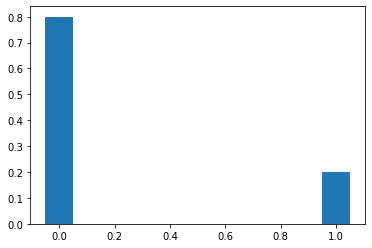

In [1]:
# %load '2.4.1.Ber.py'
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

t = 0.2
Y = bernoulli(t)
y = [0, 1]
print(y, Y.pmf(y), Y.rvs(10))
plt.bar(y, Y.pmf(y), width=0.1)
plt.show()


## Distribución binomial

[ 0  1  2  3  4  5  6  7  8  9 10] [1.07374182e-01 2.68435456e-01 3.01989888e-01 2.01326592e-01
 8.80803840e-02 2.64241152e-02 5.50502400e-03 7.86432000e-04
 7.37280000e-05 4.09600000e-06 1.02400000e-07] [3 3 1 4 2 1 2 0 0 2]


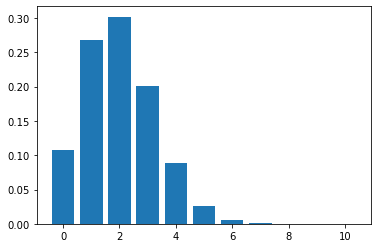

In [2]:
# %load '2.4.1.Bin.py'
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

N, t = 10, 0.2
S = binom(N, t)
s = np.arange(N+1)
print(s, S.pmf(s), S.rvs(10))
plt.bar(s, S.pmf(s))
plt.show()


## Función sigmoide

La sigmoide transforma la recta real en $[0, 1]$:
$$\sigma(a)=\dfrac{1}{1+e^{-a}}$$

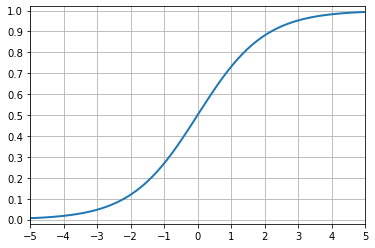

In [3]:
# %load '2.4.2.sigmoid.py'
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(a):
	return 1 / (1 + np.exp(-a))

a = np.linspace(-5, 5, 200)
plt.figure()
plt.plot(a, sigmoid(a), linewidth=2)
plt.grid(True)
plt.axis([-5, 5, -0.02, 1.02])
plt.xticks(np.arange(-5, 6, step=1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()


La sigmoide se emplea para predecir la media de una Bernoulli condicional,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\operatorname{Ber}(y\mid\sigma(f(\boldsymbol{x};\boldsymbol{\theta}))),$$
mediante un predictor no normalizado de la media, $a=f(\boldsymbol{x};\boldsymbol{\theta})$; esto es, 
$$
\sigma(a)\xrightarrow{a\to-\infty} 0
\quad\text{y}\quad%
\sigma(a)\xrightarrow{a\to\infty} 1
$$
Así los parámetros de $f(\boldsymbol{x};\boldsymbol{\theta})$ pueden ajustarse sin restricciones.

## Función logit

La logit transforma $[0,1]$ en la recta real:
$$\operatorname{logit}(p)=\log\left(\frac{p}{1-p}\right)$$
Si $p$ es la probabilidad de que un cierto evento ocurra, su logit es el logaritmo de las posibilidades de que el evento ocurra frente a que no ocurra; log-odds en inglés.
Así, tenemos tres casos:
1. Más posibilidades de ocurrir que de no: odds mayor que $1$ y log-odds positiva
2. Igual posibilidades de ocurrir que de no: odds $1$ y log-odds nula
3. Menos posibilidades de ocurrir que de no: odds menor que $1$ y log-odds negativa

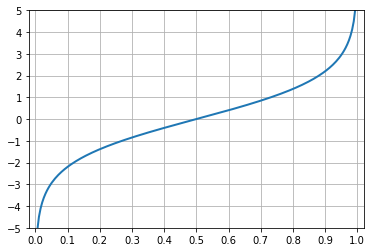

In [4]:
# %load '2.4.2.logit.py'
import numpy as np
import matplotlib.pyplot as plt

def logit(p):
	return np.log(p / (1 - p))

p = np.linspace(.001, .999, 200)
plt.figure()
plt.plot(p, logit(p), linewidth=2)
plt.grid(True)
plt.axis([-0.02, 1.02, -5, 5])
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(-5, 6, step=1))
plt.show()


Claramente, la gráfica de la logit es inversa a la de la sigmoide. De hecho, teniendo en cuenta que
$$\begin{align*}
\sigma(a)%
&=\frac{1}{1+e^{-a}}=\frac{e^a}{1+e^a}\\%
1-\sigma(a)%
&=1-\dfrac{1}{1+e^{-a}}%
=\dfrac{e^{-a}}{1+e^{-a}}%
=\dfrac{1}{1+e^a}=\sigma(-a)%
\end{align*}$$
se comprueba fácilmente que la logit es la inversa de la sigmoide:
$$\operatorname{logit}(\sigma(a))%
=\log\left(\frac{\sigma(a)}{1-\sigma(a)}\right)%
=\log\left(\frac{e^a}{1+e^a}\frac{1+e^a}{1}\right)%
=\log(e^a)=a$$
Por tanto, **la logit transforma probabilidad en log-odds y la sigmoide log-odds en probabilidad.**

## Regresión logística binaria

Regresión logística binaria es una Bernoulli condicional para clasificación binaria,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\operatorname{Ber}(y\mid\sigma(f(\boldsymbol{x};\boldsymbol{\theta}))),$$
de log-odds lineal con la entrada,
$$f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{x}+b,$$
por lo que
$$\begin{align*}
p(y=1\mid\boldsymbol{x};\boldsymbol{\theta})%
&=\sigma(\boldsymbol{w}^t\boldsymbol{x}+b)%
=\frac{1}{1+\exp(-(\boldsymbol{w}^t\boldsymbol{x}+b))}\\
p(y=0\mid\boldsymbol{x};\boldsymbol{\theta})%
&=\sigma(-(\boldsymbol{w}^t\boldsymbol{x}+b))%
=\frac{1}{1+\exp(\boldsymbol{w}^t\boldsymbol{x}+b)}%
\end{align*}$$
La frontera entre clases se obtiene con log-odds nula.

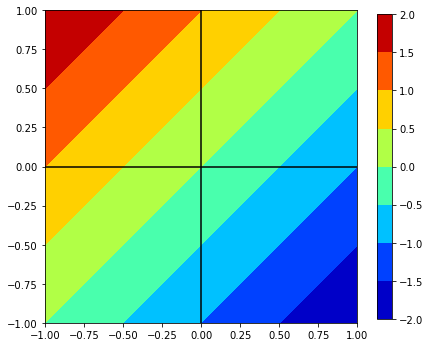

In [54]:
x_min = y_min = -1.0
x_max = y_max = 1.0
x, y = np.meshgrid(np.linspace(x_min, x_max, num=10), np.linspace(y_min, y_max, num=10))
w1 = -1.0
w2 = 1.0
b = 0.0
f = w1 * x + w2 * y + b
fig, ax = plt.subplots(figsize=(7, 7))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.set_aspect('equal')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.contourf(x, y, f, cmap = 'jet')
plt.colorbar(shrink=.8)
plt.show()